# Exploring Financial Data Using Nasdaq Data Link API

In this project, we are going to make API requests to retrieve financial data from the NASDAQ Data Link API. After that, we will transform the data into a DataFrame and plot some trends in companies' accrued expenses turnovers. We will also examine the average accrued expenses turnovers across different countries

## API KEY And Documentation

In [1]:
##importing API KEY
import config
api_key = config.API_KEY

From the [API documentation](https://docs.data.nasdaq.com/docs/in-depth-usage-1) you can find out that the base url for Nasdaq API is `https://data.nasdaq.com/api/v3/datatables/{datatable_code}.{format}`. 

Data can be filtered by columns `date`, `ticker`, `shares_outstanding`, `nav`, `flow_daily`.

You can also see that there are some rate limits: I am able to make 300 calls pers 10 seconds, 2000 calls per 10 minutes and a limit of 50000 calls per day with my API key, because I am not a premium subscriber.

# Creating parameters and API URL

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import json

# API_url for MER/F1 table
api_url = 'https://data.nasdaq.com/api/v3/datatables/MER/F1.json/'

#parameters
parameters = {
    'api_key': api_key,
    'qopts.per_page': 10
}

response = requests.get(api_url, params=parameters)
json_data = response.json()
print(json_data)

{'datatable': {'data': [[2438, 1868192544, -1802, 10.481948, '2011-06-30', 'Q2', 'U', 'EUR', 'True', 'Deutsche Bank AG', 'Deutsche Bank AG', 'Active', 'DEU', 'Europe', 1159508, '5.1.1', 'DB', 'NYS', 'Taunusanlage 12', None, None, None, 'Frankfurt am Main', None, 'DEU', '60325', '(49) 69 910 00', '(49) 69 910 34 225', 'www.db.com', '2023-12-31', 'Accrued Expenses Turnover', 'Derived'], [2438, 1868216112, -1802, 8.161754, '2011-09-30', 'Q3', 'U', 'EUR', 'True', 'Deutsche Bank AG', 'Deutsche Bank AG', 'Active', 'DEU', 'Europe', 1159508, '5.1.1', 'DB', 'NYS', 'Taunusanlage 12', None, None, None, 'Frankfurt am Main', None, 'DEU', '60325', '(49) 69 910 00', '(49) 69 910 34 225', 'www.db.com', '2023-12-31', 'Accrued Expenses Turnover', 'Derived'], [2438, 1885063456, -1802, 10.788213, '2012-06-30', 'Q2', 'U', 'EUR', 'True', 'Deutsche Bank AG', 'Deutsche Bank AG', 'Active', 'DEU', 'Europe', 1159508, '5.1.1', 'DB', 'NYS', 'Taunusanlage 12', None, None, None, 'Frankfurt am Main', None, 'DEU', '60

From above we can see that our request works, and we obtained a small sample data in JSON form. Next we are going to turn it into a DataFrame.

## Processing the JSON Data into a DataFrame

The JSON data is in a list of lists format. One list inside the main list equals one row of data.

In [3]:
#changing parameters to 10000 rows
parameters = {
    'api_key': api_key,
    'qopts.per_page': 10000
}
json_data = requests.get(api_url, params=parameters).json()

data = json_data['datatable']['data']
columns = [col['name'] for col in json_data['datatable']['columns']]

df_metric = pd.DataFrame(data, columns=columns)
df_metric.head(5)

,compnumber,reportid,mapcode,amount,reportdate,reporttype,auditorstatus,currency,consolidated,longname,...,city,statecode,country,zipcode,phonenumber,faxnumber,website,fye,indicator,statement
0,2438,1868192544,-1802,10.481948,2011-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived
1,2438,1868216112,-1802,8.161754,2011-09-30,Q3,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived
2,2438,1885063456,-1802,10.788213,2012-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived
3,2438,1885087024,-1802,9.437545,2012-09-30,Q3,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived
4,2438,1901934112,-1802,8.755041,2013-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived


# Dataset Information

The goal is to 
1. Analyze the financial trend of 'accrued expenses turnover' over a period for various companies, particularly banks.
2. Examine how different regions contribute to these financial metrics

To answer these questions, we can drop columns that are not needed for our analysis.

In [4]:
df_metric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   compnumber     10000 non-null  int64  
 1   reportid       10000 non-null  int64  
 2   mapcode        10000 non-null  int64  
 3   amount         10000 non-null  float64
 4   reportdate     10000 non-null  object 
 5   reporttype     10000 non-null  object 
 6   auditorstatus  9999 non-null   object 
 7   currency       10000 non-null  object 
 8   consolidated   10000 non-null  object 
 9   longname       10000 non-null  object 
 10  shortname      10000 non-null  object 
 11  status         10000 non-null  object 
 12  countrycode    10000 non-null  object 
 13  region         10000 non-null  object 
 14  cik            10000 non-null  int64  
 15  mic            10000 non-null  object 
 16  ticker         9380 non-null   object 
 17  exchange       10000 non-null  object 
 18  address

In [5]:
# columns needed for analysis
necessary_columns = ['reportid', 'amount', 'reportdate', 'reporttype', 'currency', 'longname',
                     'country', 'region', 'indicator', 'statement']

Above I have selected the columns that are necessary for the analysis. Here's a small explanation why:

| Column Name | Description | Why? |
|-------------|-------------|------|
|`reportid`   | ID associated with a specific financial report | Unique ID helps to identify different reports |
|`amount`     | Numerical value of the financial metric | To find trends, we need to see the change in amounts |
|`reportdate` | Date of the financial report | Shows us trends during different time periods |
|`reporttype` | Type of report (Q1, Q2, etc) | Shows us trends between quarters |
|`currency`   | Currency in which financial amounts are reported | Important to know which value we are talking about |
|`longname`   | The name of the company | Easy to identify the company when using full name |
|`country`    | The country where the company is situated | Needed to analyse differences in between countries |
|`region`     | The region where the company is situated | Needed to analyse differences in between regions |
|`indicator`  | Specific financial indicator being reported | Needed to find accrued expenses turnovers |
|`statement`  | Type of financial statement from which the data is derived | Tells us about comparability and reliability |

## Filtering the DataFrame for Analysis

In [6]:
filtered_df = df_metric[necessary_columns]
filtered_df = pd.DataFrame(filtered_df)

# Filtering for Accrued Expenses turnover
filtered_df = filtered_df[filtered_df['indicator'] == "Accrued Expenses Turnover"]
print(filtered_df.shape)
print(filtered_df.describe())

(139, 10)
           reportid      amount
count  1.390000e+02  139.000000
mean   1.633594e+09   26.908762
std    1.385283e+08   33.097291
min    1.504051e+09    4.689773
25%    1.543963e+09    9.675670
50%    1.581646e+09   13.753753
75%    1.622541e+09   31.777614
max    1.952498e+09  229.810427


When filtering our data to only contain rows about "Accrued Expenses Turnover", the dataframe goes from 10000 rows to only 139 rows. With describe we can see that the average accrued expenses turnover is 26.91. The minimum amount is 4.69 and the maximum amount is 229.81. Standard deviation is 33.10, which means that there are big differences in how companies manage their short-term liabilities.

# Making data more readable

In [7]:
#fixing country names
print(filtered_df['country'].unique())

['DEU' 'BHS' 'GBR' 'JPN' 'CYM' 'USA' 'IRL']


In [8]:
def update_country_name(name):
    if name == 'DEU':
        name = 'Germany'
    elif name == 'BHS':
        name = 'Bahamas'
    elif name == 'GBR':
        name = 'Great Britain'
    elif name == 'JPN':
        name = 'Japan'
    elif name == 'CYM':
        name = 'Cayman Islands'
    elif name == 'USA':
        name = 'United States of America'
    elif name == 'IRL':
        name = 'Ireland'
    return name

filtered_df['country'] = filtered_df['country'].apply(update_country_name)
filtered_df.columns = ['report_id', 'amount', 'report_date', 'report_type', 'currency', 'company_name', 'country', 'region',
                       'indicator', 'statement']
updated_df = filtered_df.copy()
print(updated_df.head(2))
print(updated_df['country'].value_counts())

    report_id     amount report_date report_type currency      company_name  \
0  1868192544  10.481948  2011-06-30          Q2      EUR  Deutsche Bank AG   
1  1868216112   8.161754  2011-09-30          Q3      EUR  Deutsche Bank AG   

   country  region                  indicator statement  
0  Germany  Europe  Accrued Expenses Turnover   Derived  
1  Germany  Europe  Accrued Expenses Turnover   Derived  
country
United States of America    31
Japan                       27
Cayman Islands              27
Ireland                     25
Bahamas                     19
Germany                      6
Great Britain                4
Name: count, dtype: int64


Abowe we can see the value counts for each country in our dataset.

## Understanding financial trends over time

In [9]:
# changing date type
updated_df['report_date'] = pd.to_datetime(updated_df['report_date'])
#selecting years 2010-2015
df_2010_2015 = updated_df[(updated_df['report_date'].dt.year >= 2010) & (updated_df['report_date'].dt.year <= 2015)]

#selecting columns
relevant_columns = ['company_name', 'amount', 'report_date']
relevant_data = updated_df[relevant_columns]

print(relevant_data.head(3))

       company_name     amount report_date
0  Deutsche Bank AG  10.481948  2011-06-30
1  Deutsche Bank AG   8.161754  2011-09-30
2  Deutsche Bank AG  10.788213  2012-06-30


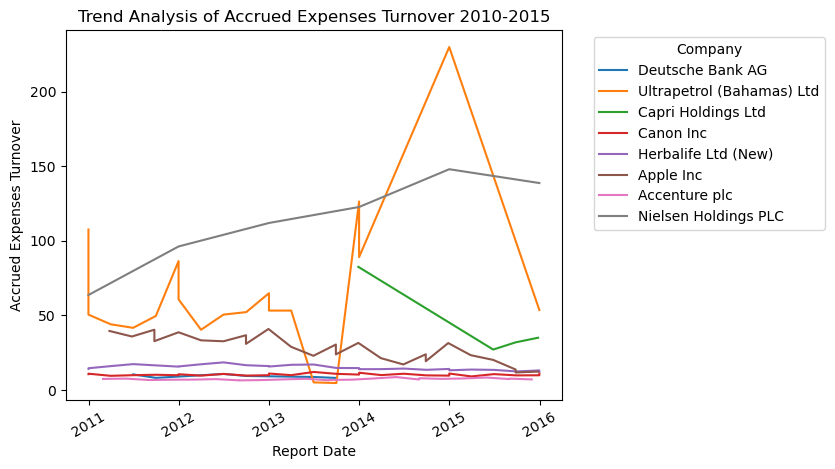

In [10]:
company_names = list(relevant_data['company_name'].unique())

for company in company_names:
    company_data = relevant_data[relevant_data['company_name'] == company]
    plt.plot(company_data['report_date'],company_data['amount'], label = company)

plt.title('Trend Analysis of Accrued Expenses Turnover 2010-2015')
plt.xlabel('Report Date')
plt.ylabel('Accrued Expenses Turnover')
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=30)

plt.show()

From the graph above we can see that Ultrapetrol (Bahamas) Ltd had a huge spike in Accrued Expenses turnover between 2014 and 2015, but after that it returned to company's normal amount. Companies like Herbalife Ltd (New), Accenture plc, Cann Inc and Deutsche Bank AG have very low amount of Accrued Expenses Turnover, but the trend is stable. Apple has little declining trend, but overall it is very stable. Nielsen Holdings PLC had upward trend between 2011 and 2015.

## Geographical Region Analysis

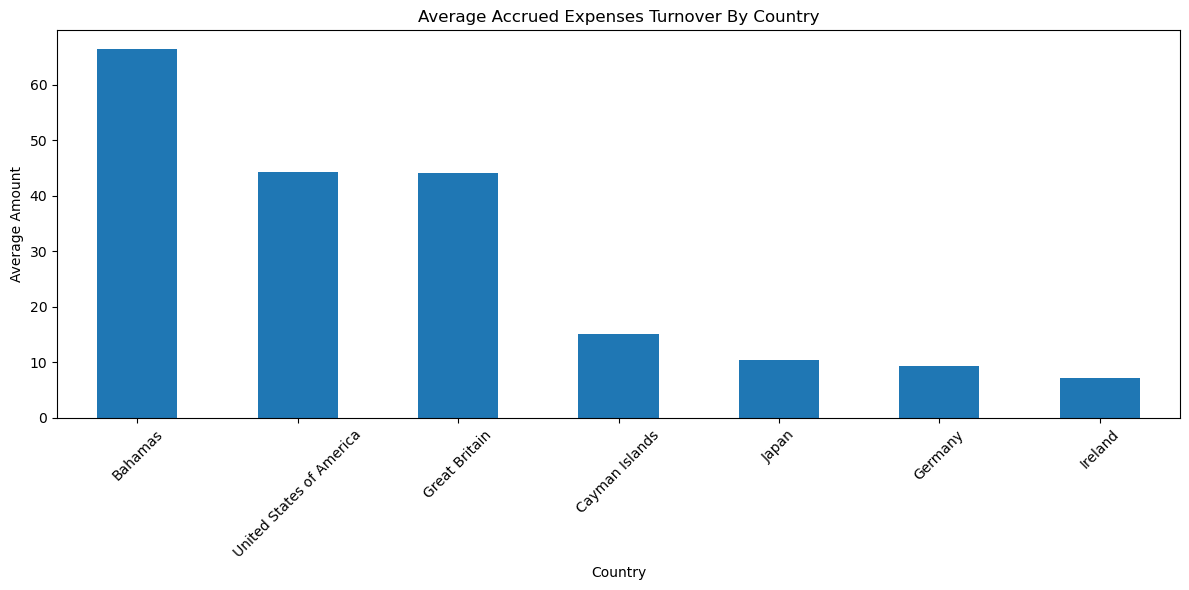

In [11]:
#grouping by country

country_data_avg = updated_df.groupby('country')['amount'].mean()

plt.figure(figsize=(12,6))
country_data_avg.sort_values(ascending=False).plot(kind = 'bar')
plt.title('Average Accrued Expenses Turnover By Country')
plt.xlabel('Country')
plt.ylabel('Average Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From the plot above we can see that Bahamas had the highest average amount of Accrued Expenses Turnover.